# Part 1: Import Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Change display options
pd.set_option('display.max_rows', None)

In [2]:
# Set working directory
import os
os.chdir("C:\\Users\\msgib\\OneDrive\\Documents\\Data Analysis")

In [3]:
# Read in the data
df = pd.read_csv(r'Amazon_Alexa_Reviews.csv')

# Part 2: Cleaning the Data

In [4]:
# Observe the first few rows of the data
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
# Observe if there is missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

 rating - 0.0%
date - 0.0%
variation - 0.0%
verified_reviews - 0.0%
feedback - 0.0%


In [6]:
# Check the amount of unique rows
df.nunique()

 rating                5
date                  77
variation             16
verified_reviews    2301
feedback               2
dtype: int64

Observation: As only 2301 out of the 3150 reviews are unique, I suspect there are duplicates in this dataset. However, they will not be removed, as Amazon allows one review per purchase, and it is plausible that people made more than one purchase and left the same review/rating both times.

In [7]:
# Check each column's data type
df.dtypes

 rating              int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [8]:
# Clean the verified_reviews column 
wordList = stopwords.words("english")

def clean(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^\w\d]"," ", sentence)
    sentence = " ".join([i for i in sentence.split() if i not in wordList])
    return sentence

df['Cleaned_Review'] = df['verified_reviews'].apply(lambda x : clean(x))

In [9]:
# Drop unnecessary columns
df.drop(columns=['date', 'variation', 'feedback'], inplace = True)

In [10]:
# Rename the columns
df = df.rename(mapper = str.strip, axis = 'columns')
df.rename(columns = {'verified_reviews':'Full_Review', 'rating' : 'Rating'}, inplace = True)

In [11]:
# View the clean(er) dataset
df.head()

,Rating,Full_Review,Cleaned_Review
0,5,Love my Echo!,love echo
1,5,Loved it!,loved
2,4,"Sometimes while playing a game, you can answer...",sometimes playing game answer question correct...
3,5,I have had a lot of fun with this thing. My 4 ...,lot fun thing 4 yr old learns dinosaurs contro...
4,5,Music,music


# Part 3: Exploratory/Descriptive Analysis on Ratings and Reviews

In [12]:
# Determine the average length of a review
avg_len = np.mean(df['Full_Review'].apply(lambda x: len([words for words in x.split(" ") if isinstance(x, str)])))
avg_len

25.74825396825397

Observation: The average length of a review is ~26 words. This shows that people care enough about the product to take the time to write a relatively long review.

In [13]:
# Determine the average rating given to the product
avg_rate = df['Rating'].mean()
avg_rate

4.463174603174603

Observation: The average rating is roughly 4.46/5, which suggests that people are very satisfied with the product

In [14]:
# Observe how many of each rating was used
ratings = df['Rating'].value_counts()
ratings

5    2286
4     455
1     161
3     152
2      96
Name: Rating, dtype: int64

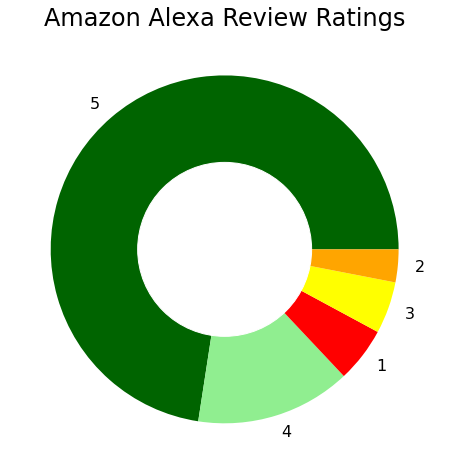

In [15]:
# Create a donut chart illustrating the amount of each rating used
numbers = ratings.index
amount = ratings.values

# Set figure size and font size
plt.figure(figsize=(10, 8))
plt.rc('font', size = 16)

# Create list of colors each rating will take
colorList = ["darkgreen", "lightgreen", "red", "yellow", "orange"]

# Create the donut chart
plt.pie(amount, labels = numbers, colors = colorList)
center = plt.Circle((0,0), 0.5, color = 'white')
figure = plt.gcf()
figure.gca().add_artist(center)
plt.title("Amazon Alexa Review Ratings", size = 24);

Observation: ~75% of the ratings are a perfect 5/5, and ~90% are at least a 3/5. This suggests people believe the Amazon Alexa is a great product. We will see if the reviews indicate a similar sentiment.

# Part 4: Sentiment Analysis on Reviews

In [16]:
# Add in the columns for Positivity, Negativity, and Neutrality
sentiment = SentimentIntensityAnalyzer()

df['Positivity'] = [sentiments.polarity_scores(i)['pos'] for i in df["Cleaned_Review"]]
df['Negativity'] = [sentiments.polarity_scores(i)['neg'] for i in df["Cleaned_Review"]]
df['Neutrality'] = [sentiments.polarity_scores(i)['neu'] for i in df["Cleaned_Review"]]

df.head()

,Rating,Full_Review,Cleaned_Review,Positivity,Negativity,Neutrality
0,5,Love my Echo!,love echo,0.808,0.000,0.192
1,5,Loved it!,loved,1.000,0.000,0.000
2,4,"Sometimes while playing a game, you can answer...",sometimes playing game answer question correct...,0.201,0.145,0.654
3,5,I have had a lot of fun with this thing. My 4 ...,lot fun thing 4 yr old learns dinosaurs contro...,0.554,0.000,0.446
4,5,Music,music,0.000,0.000,1.000


In [17]:
# Determine the number of positive, negative, and neutral comments
a = sum(df["Positivity"])
b = sum(df["Negativity"])
c = sum(df["Neutrality"])

# Create a function that will assess the general opinion of Amazon Alexa reviews
def overall_view(x,y,z):
    if (x>y) and (x>z):
        print("Overall, opinions are positive")
    elif (y>x) and (y>z):
        print("Overall, opinions are negative")
    else:
        print("Overall, opinions are neutral")

overall_view(a,b,c)

Overall, opinions are neutral


In [18]:
# Observe how many reviews were Positive, Negative, and Neutral
print("Positive: ", a)
print("Negative: ", b)
print("Neutral: ", c)

Positive:  1440.4830000000038
Negative:  121.452
Neutral:  1502.068999999993


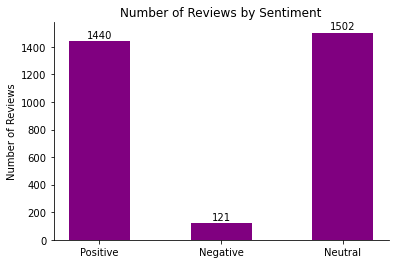

In [19]:
# Create a bar chart depicting the number of positive, negative, and neutral reviews
sentiment_types = ["Positive", "Negative", "Neutral"]
sentiment_values = [int(a), int(b), int(c)]

# Set text size to default
plt.rc('font', size = 10)
        
# Remove the top and right spines
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Create the bar chart
bars = plt.bar(sentiment_types, sentiment_values, color = 'purple', width = 0.5)
plt.title("Number of Reviews by Sentiment")
plt.ylabel("Number of Reviews")

# Add in the labels for each bar
for i in range(len(sentiment_types)):
    plt.text(i, sentiment_values[i] + 25, sentiment_values[i], ha = 'center')

Observation: It appears that peoples' reviews are split between either being positive or neutral. This suggests that the product is not as perfect as its ratings seem to indicate, and more can be done to improve the product. However, it is important to note that the low number of negativity about the product is consistent between the reviews and ratings. Also, this analysis demonstrates a flaw of a 1-5 rating system, in that it overgeneralizes how people view a product/thing.

# Part 5: Recommendations for Improvements

In [20]:
# Isolate the mostly negative reviews (> .500) AND those with a rating of less than or equal to 2/5
neg_rev = df[df['Negativity'] > .500].sort_values('Negativity', ascending = False)
neg_rev = neg_rev[neg_rev['Rating'] <= 2]

neg_rev

,Rating,Full_Review,Cleaned_Review,Positivity,Negativity,Neutrality
1576,1,It f****** sucks,f sucks,0.000,1.000,0.000
1200,2,Meh,meh,0.000,1.000,0.000
1378,2,Fairly useless.,fairly useless,0.000,0.737,0.263
871,2,Sad joke. Worthless.,sad joke worthless,0.268,0.732,0.000
176,2,Sad joke. Worthless.,sad joke worthless,0.268,0.732,0.000
398,1,Dont trust this....,dont trust,0.000,0.730,0.270
2515,1,The volume is very low,volume low,0.000,0.677,0.323
2866,1,The volume is very low,volume low,0.000,0.677,0.323
1903,1,Terrible. Stopped working after one day.,terrible stopped working one day,0.000,0.625,0.375
618,1,Extremely low in volume,extremely low volume,0.000,0.545,0.455


Looking at the above, here appears to be the reasons for some of the low reviews:
    
    1) Low Volume  
    2) Breaks easily / poor quality    

In order to better the reviews the product, which could possibly lead to more sales and more revenue, Amazon should address these two issues in their next version/update of the product. 

*Note: The sentiment analyzer mistakes a fair amount of positively rated reviews as negative. I have no control over how the sentiment analyzer processes reviews. To only see the truly negative reviews, I included the condition that the rating was less than average (<= 2)*

In [21]:
# Isolate the mostly positive reviews (> .500)
pos_rev = df[df['Positivity'] > .500].sort_values('Positivity', ascending = False)

# There are many, many rows that will be returned. Most are useless for finding specific features the user enjoys. Therefore, to
# find this information, I only returned rows having more than 10 words
pos_rev[pos_rev['Full_Review'].str.count(' ').gt(10)].head(25)

# Had I not called for only the first 25, many rows would have been returned. 

,Rating,Full_Review,Cleaned_Review,Positivity,Negativity,Neutrality
1101,4,It was a gift and the recipient love love love...,gift recipient love love loves,0.938,0.0,0.062
1858,5,"Loved all about it, all I can do with it and i...",loved looks good,0.872,0.0,0.128
371,5,I sure love Alexa! LOL! Thank you! Great pr...,sure love alexa lol thank great price product,0.841,0.0,0.159
1978,5,"well what can you say, Love It Love It Love...",well say love love love enough said,0.831,0.0,0.169
121,5,I love my Echo smart speaker. I love the volu...,love echo smart speaker love volume clarity ea...,0.823,0.0,0.177
816,5,I love my Echo smart speaker. I love the volu...,love echo smart speaker love volume clarity ea...,0.823,0.0,0.177
2822,5,I AM COMPLETELY IN LOVE. DOES ABSOLUTELY EVERY...,completely love absolutely everything amazing ...,0.812,0.0,0.188
2471,5,I AM COMPLETELY IN LOVE. DOES ABSOLUTELY EVERY...,completely love absolutely everything amazing ...,0.812,0.0,0.188
1810,5,Amazon Music is great. Love the ability to cre...,amazon music great love ability create playlis...,0.811,0.0,0.189
2490,4,I like it and it’s helful but it can only do c...,like helful certain thongs supported amazon,0.811,0.0,0.189


Scanning through the above, here appears to be some features of the products that users enjoy:    

    1) Good Value / Good Price  
    2) Easy to set up and use
    3) Ability to create playlists
    
The above features should remain unchanged when the product is updated. These are features people seem to enjoy. Changing these features could lead to more negative reviews, which could lead to less sales and less revenue / a loss of revenue.

# Part 6: Export to Excel for visualizations in Tableau

In [22]:
# Loop over the words from the most positive and most negative reviews and add into lists
neg_words = []
pos_words = []

for value in neg_rev['Cleaned_Review'].str.split(' '):
    neg_words.extend(value)

for value in pos_rev['Cleaned_Review'].str.split(' '):
    pos_words.extend(value)

# Store the lists of words into data frames        
neg_words_df = pd.DataFrame(neg_words)
pos_words_df = pd.DataFrame(pos_words)

In [23]:
# Export data tables to Excel
import openpyxl

neg_words_df.to_excel(r'Alexa_Reviews_Neg_Words.xlsx', index=False)
pos_words_df.to_excel(r'Alexa_Reviews_Pos_Words.xlsx', index=False)